<a href="https://colab.research.google.com/github/micky619/holiday-similarity/blob/master/13_FLANN_INDEX_KDTREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Google Drive auth
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 113598 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# !ls

adc.json  sample_data


In [0]:
'''
!pip freeze > requirements.txt
!cat requirements.txt
'''

In [0]:
!mkdir -p GDrive
!google-drive-ocamlfuse GDrive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!ls

adc.json  GDrive  sample_data


In [0]:
import os


In [0]:
from __future__ import division, print_function
from keras import backend as K
from keras.applications import inception_v3
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, merge
from keras.layers.core import Activation, Dense, Dropout, Lambda
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from random import shuffle
from scipy.misc import imresize
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
%matplotlib inline

Using TensorFlow backend.


#### GPU

In [0]:
os.environ["CUDA_VISIBLE_DEVICE"] = "0" # setting wanna use GPU No.
os.system('echo $CUDA_VISIBLE_DEVICE')

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4 # setting GPU in-use memory
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
set_session(tf.Session(config=config))

#### To reset GPU memory

In [0]:
def limit_mem():
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

### Extract Features

[[Tutorial] Image Feature Extraction and Matching | Kaggle](https://www.kaggle.com/wesamelshamy/tutorial-image-feature-extraction-and-matching)

In [0]:
# !pip uninstall opencv-python

In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

  Using cached https://files.pythonhosted.org/packages/bd/c9/364f02bb1d2186405995dbb2b579f3c55b68134a9513a7068e0cdbaeb928/opencv_python-3.4.2.16-cp37-cp37m-win_amd64.whl


d:\anaconda3\lib\site-packages\pip\_internal\req\req_install.py:391: UserWarning: Unbuilt egg for Unknown [unknown version] (d:\anaconda3\lib\site-packages)
  self.satisfied_by = pkg_resources.get_distribution(str(no_marker))
Error checking for conflicts.
Traceback (most recent call last):
  File "d:\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2584, in version
    return self._version
  File "d:\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2691, in __getattr__
    raise AttributeError(attr)
AttributeError: _version

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 503, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "d:\anaconda3\lib\site-packages\pip\_internal\operations\check.py", line 108, in check_install_conflicts
    package_set, _ = create_pa

Error checking for conflicts.
Traceback (most recent call last):
  File "d:\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2584, in version
    return self._version
  File "d:\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2691, in __getattr__
    raise AttributeError(attr)
AttributeError: _version

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 503, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "d:\anaconda3\lib\site-packages\pip\_internal\operations\check.py", line 108, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "d:\anaconda3\lib\site-packages\pip\_internal\operations\check.py", line 47, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version, dist.requires())
  File "

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [0]:
os.getcwd()

'D:\\OneDrive - Accton Technology Corporation'

In [0]:
DATA_DIR = "X:\\Laser_eyes"
IMAGE_DIR = os.path.join(DATA_DIR, "20190212-045401")
VERIFY_DIR = os.path.join(DATA_DIR, "Verify_LaserEyes")

dataset_path = 'X:\\Laser_eyes\\20190212-045401'

In [0]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()

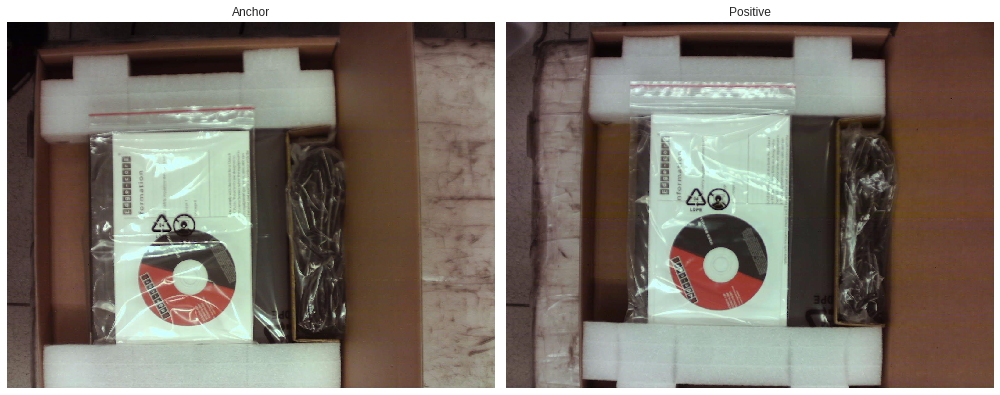

In [0]:
ref_image = plt.imread(os.path.join(TUNE_DIR, "F0LEC4312200Z_538134c4-0867-4a94-9981-087aed78548d_G.jpg")) # Anchor
sim_image = plt.imread(os.path.join(TUNE_DIR, "F0LEC4312200Z_0b142681-1f7f-45d0-b5e8-bb016173b53c.jpg")) # positive
dif_image = plt.imread(os.path.join(TUNE_DIR, "FAIL_FI2MK8024002E_1_20180227163539078_N.jpg")) # negative

def draw_image(subplot, image, title):
    plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
plt.figure(num='packing',figsize=(14,14))    
draw_image(121, ref_image, "Anchor")
draw_image(122, sim_image, "Positive")
# draw_image(122, dif_image, "Negative")
plt.tight_layout()
plt.show()

In [0]:
file_vars = []
path_vars = []
model_vars = []
mark_vars = []

for root, dirs, files in os.walk(IMAGE_DIR): 
#     if len(dirs) != 0: 
    for i in range(len(files)): 
        if files[i][-3:] == 'jpg':
            file_path = root+'\\'+files[i]
            model_vars.append(file_path.split('\\', 5)[-3])
            mark_vars.append(file_path.split('\\', 5)[-2])
            file_vars.append(file_path.split('\\', 5)[-1])
#             path_vars.append(file_path)
#             for 
#             print(file_path.split('/', 6)[-2])
#             print(file_path)
                
#     for name in dirs:
#             print(os.path.join(root, name))
#             mark_vars.append(name)
#         print(name)

In [0]:
df = pd.DataFrame()

df['model'] = model_vars
df['mark'] = mark_vars
df['file'] = file_vars
df.head().append(df.tail())

,model,mark,file
0,F0S186612020A-20190128,Sample,F0S186612020A_2060dec6-3b8b-48c5-acc1-fe275288...
1,F0S186612020A-20190128,Sample,F0S186612020A_55942394-5e1f-4387-b897-3d0c29ef...
2,F0S186612020A-20190128,Fail,F0S186612020A_99cd3293-1dd1-4eed-9bc2-a8ea4740...
3,F0S186612020A-20190128,Fail,F0S186612020A_da39955c-7578-439b-9d61-4f0bbd6b...
4,F0S186612020A-20190128,Fail,F0S186612020A_4d6d26a6-7de6-4de1-9130-e957880a...
3401,FWSTRPIDS500A-20190122,Fail,FWSTRPIDS500A_a1f0e130-11c3-41f5-9312-88683e8c...
3402,FWSTRPIDS500A-20190122,Fail,FWSTRPIDS500A_48c4afb9-41c7-454a-a9e0-c990ea2e...
3403,FWSTRPIDS500A-20190122,Fail,FWSTRPIDS500A_db3670c1-0006-4924-aeec-14324f2c...
3404,FWSTRPIDS500A-20190122,Fail,FWSTRPIDS500A_04f8e432-38f8-45b8-8466-fb5b78f0...
3405,FWSTRPIDS500A-20190122,Fail,FWSTRPIDS500A_69e2c7a3-c7b0-467f-aa42-65cc647f...


In [0]:
list_vars = df['model'].unique()
j = 0

for list in list_vars:

    try:
        os.makedirs(os.path.join(VERIFY_DIR, list))
  
        df_pair = pd.DataFrame()
        df_pair = df[df['model'] == list]
        df_pair = df_pair.sort_values('mark')
        anchor = os.path.join(df_pair.iloc[-1][0], df_pair.iloc[-1][1], df_pair.iloc[-1][2])
  
        for index, row in df_pair.iterrows():
    
            sift = cv2.xfeatures2d.SIFT_create()
      
            if row[1] == 'Fail':
                nagative = os.path.join(row[0], row[1], row[2])      

                img1, kp1, des1 = image_detect_and_compute(sift, anchor) # Anchor
                img2, kp2, des2 = image_detect_and_compute(sift, nagative) # Nagative
                
                # FLANN parameters
                FLANN_INDEX_KDTREE = 0 # 1
                # FLANN_INDEX_LSH = 6
                index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#                 index_params = dict(algorithm=FLANN_INDEX_LSH,
#                                     table_number = 6,  # 12
#                                     key_size = 12,    # 20
#                                     multi_probe_level = 1)  #2
                search_params = dict(checks=50) # or pass empty dictionary

                flann = cv2.FlannBasedMatcher(index_params,search_params)
                matches = flann.knnMatch(des1, des2, k=2)

                matchesMask = [[0, 0] for i in range(len(matches))]
                # ratio test as per Lowe's paper
                    for i, (m, n) in enumerate(matches):
                    if m.distance < 0.55*n.distance: # 0.55
                        matchesMask[i] = [1, 0]

                draw_params = dict(matchColor=(0, 255, 0),
                                   singlePointColor=(255, 0, 0),
                                   matchesMask=matchesMask,
                                   flags=0)

                img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
            
                j += 1
            
                plt.figure(figsize=(18, 18))
                plt.imshow(img3)
                
                plt.savefig(os.path.join(VERIFY_DIR, row[0], list+'_'+str(j).zfill(4)+'.png'), 
                            transparent=True, pad_inches = 0)
            
    except FileExistsError:
        # directory already exists
        pass
            
            
#                plt.show()

D:\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


#### TBD

In [0]:
dataset_path = 'GDrive/Colab Notebooks/Accton-Packing/Data/golden_sample'
img_building = cv2.imread(os.path.join(dataset_path, 'F0PEC4654013Z_695d34ed-602c-4d0c-9886-788d0ce14e51_G.jpg'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

error: ignored

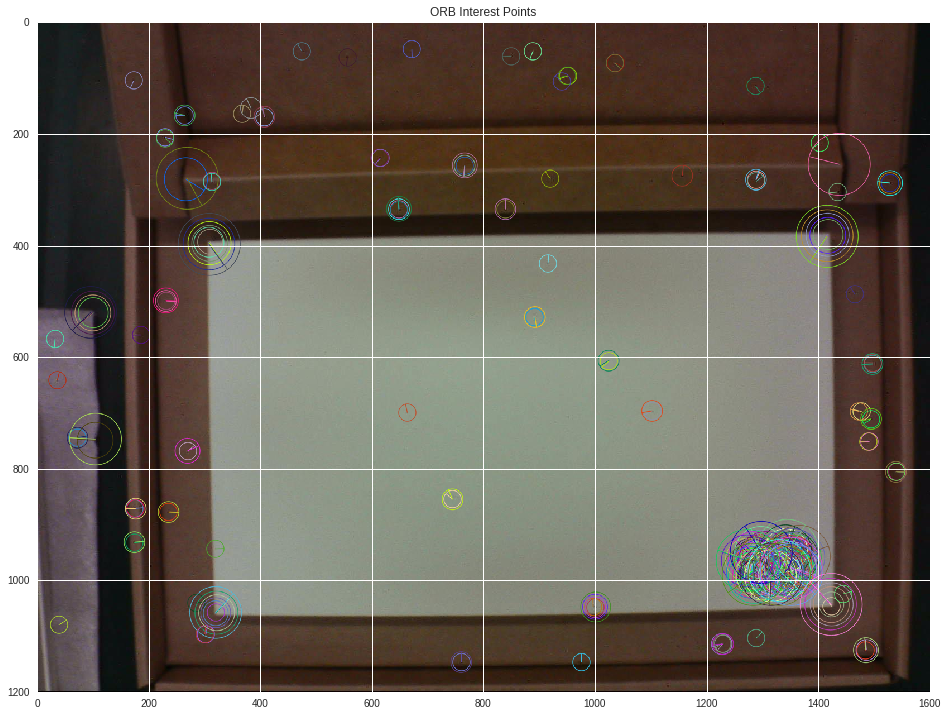

In [0]:
# dataset_path = 'GDrive/Colab Notebooks/Accton-Packing/Data/golden_sample'
img_building = cv2.imread(os.path.join(dataset_path, 'FI2MK8024002E_ec2d4381-8d55-4787-a563-dbecd5667a88.jpg'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [0]:
img1_name = 'F0LEC2000004A_9c166f9f-7c8c-49d6-9005-9c76b7a6509d.jpg' # Anchor
img2_name = 'F0LEC2000004A_760bf192-109c-4d9f-ae4b-370b4de4c1ec.jpg' # model Anchor
    
orb = cv2.ORB_create()
# draw_image_matches(orb, img1_name, img2_name)

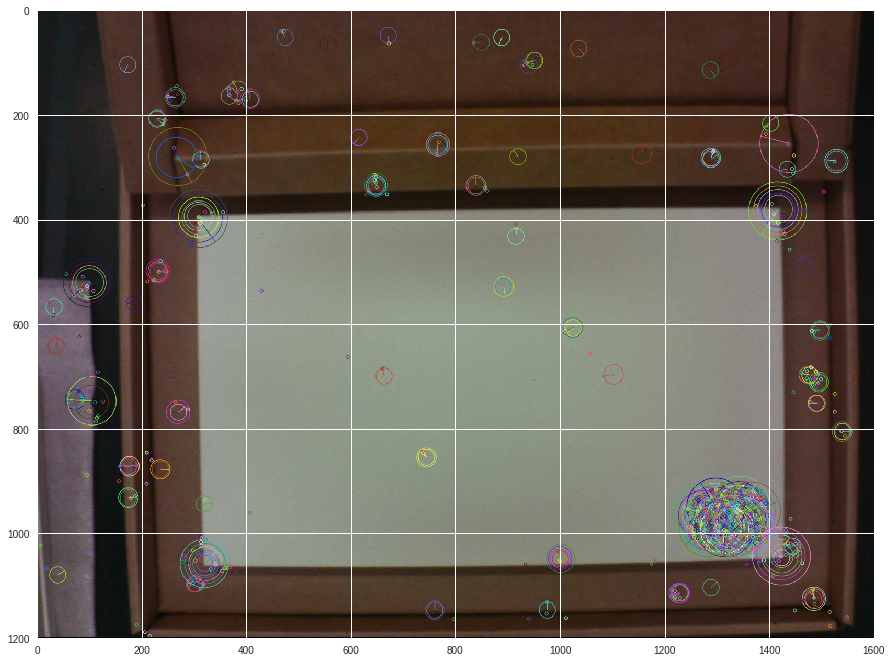

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_building, None)
img_kp = cv2.drawKeypoints(img_building, kp, img_building)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp); plt.show()

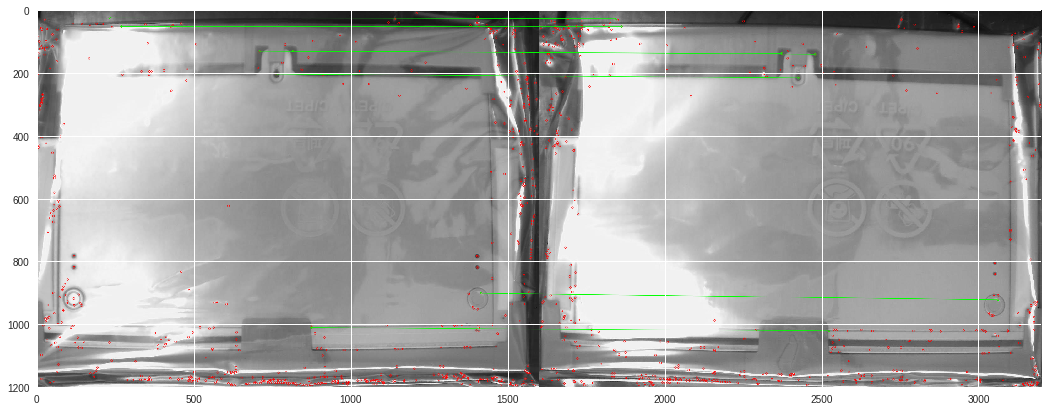

In [0]:
# img1, kp1, des1 = image_detect_and_compute(sift, 'F0LEC2000004A_9c166f9f-7c8c-49d6-9005-9c76b7a6509d_G.jpg') # Anchor
# img2, kp2, des2 = image_detect_and_compute(sift, 'F0LEC4312200Z_0b142681-1f7f-45d0-b5e8-bb016173b53c.jpg') # model Anchor

sift = cv2.xfeatures2d.SIFT_create()

ref_image = plt.imread(os.path.join(TUNE_DIR, "FI2MK8024002E_ad14b3dc-29cd-4ea9-ab68-799f02f5669a_G.jpg")) # Anchor
sim_image = plt.imread(os.path.join(TUNE_DIR, "PASS_FI2MK8024002E_1_20180227163455671.jpg")) # positive
dif_image = plt.imread(os.path.join(TUNE_DIR, "FAIL_FI2MK8024002E_1_20180227163539078_N.jpg")) # negative

img1, kp1, des1 = image_detect_and_compute(sift, 'F0S186612020A_51832135-66cf-495c-af7d-707430b6fd9c_G.jpg') # Anchor
img2, kp2, des2 = image_detect_and_compute(sift, 'F0S186612020A_764a4bfc-da40-485c-ad28-77d3688831b8.jpg') # positive

# FLANN parameters
FLANN_INDEX_KDTREE = 0 # 1
# FLANN_INDEX_LSH = 6
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# index_params = dict(algorithm=FLANN_INDEX_LSH,
#                     table_number = 6,  # 12
#                     key_size = 12,    # 20
#                     multi_probe_level = 1)  #2
search_params = dict(checks=50) # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55*n.distance: # 0.55
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.figure(figsize=(18, 18))   
plt.imshow(img3); plt.show()